Dataset generated successfully.

First 5 rows of the dataset:
            N          P          K  temperature   humidity        ph  \
0  100.734961  68.184485  51.436102    23.041360  83.468490  6.362214   
1   20.108327  15.854089  40.399979    20.243006  85.221228  5.800649   
2   22.997893  13.697463  36.976596    15.825862  88.529384  5.456081   
3   67.352200  38.516963  21.206610    18.697972  66.931617  5.897764   
4   16.658274  59.694622  14.707797    15.003878  21.002298  5.804453   

     rainfall        label  
0  113.592914       banana  
1  110.773743  pomegranate  
2  110.792029  pomegranate  
3   97.554757        maize  
4  102.620668  kidneybeans  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   float64
 1   P            2200 non-null   float64
 2   K            2200 non-nu

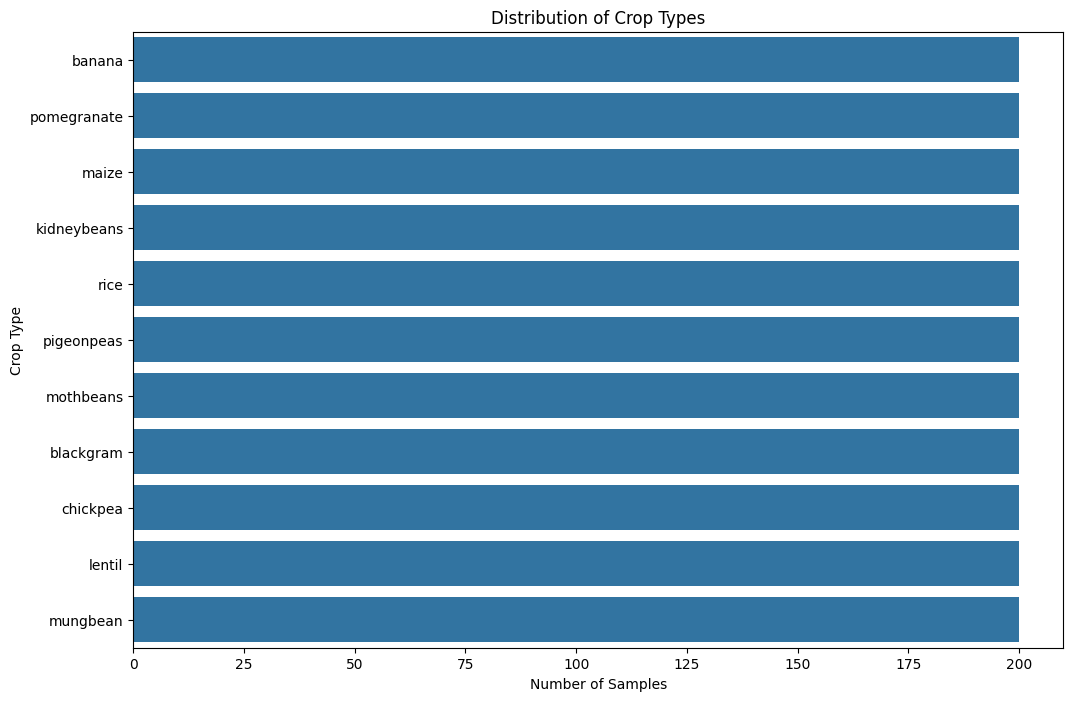

Dataset saved to ../data/crop_data.csv


In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Setup Directories
if not os.path.exists('../data'):
    os.makedirs('../data')

# 3. Generate Synthetic Data
num_samples = 2200
np.random.seed(42)

# Define ideal conditions for different crops
# N, P, K, temp, humidity, ph, rainfall
crop_conditions = {
    'rice': [90, 42, 43, 20, 80, 7, 200],
    'maize': [80, 40, 20, 21, 65, 6, 80],
    'chickpea': [40, 60, 80, 18, 16, 5, 60],
    'kidneybeans': [20, 60, 20, 20, 20, 5.5, 100],
    'pigeonpeas': [20, 60, 20, 27, 48, 5.5, 120],
    'mothbeans': [20, 40, 20, 28, 50, 6.5, 50],
    'mungbean': [20, 40, 20, 28, 85, 6.5, 50],
    'blackgram': [40, 60, 20, 27, 65, 7, 70],
    'lentil': [20, 60, 20, 24, 60, 6.5, 50],
    'pomegranate': [20, 18, 40, 20, 90, 6, 110],
    'banana': [100, 75, 50, 27, 80, 6, 100]
}

data = []
for crop, params in crop_conditions.items():
    for _ in range(num_samples // len(crop_conditions)):
        row = {
            'N': np.random.normal(params[0], 5),
            'P': np.random.normal(params[1], 5),
            'K': np.random.normal(params[2], 5),
            'temperature': np.random.normal(params[3], 2),
            'humidity': np.random.normal(params[4], 5),
            'ph': np.random.normal(params[5], 0.5),
            'rainfall': np.random.normal(params[6], 10),
            'label': crop
        }
        data.append(row)

df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True) # Shuffle the dataset
print("Dataset generated successfully.")

# 4. Data Exploration
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()

# 5. Check Class Distribution
print("\nPlotting class distribution...")
plt.figure(figsize=(12, 8))
sns.countplot(y='label', data=df)
plt.title('Distribution of Crop Types')
plt.xlabel('Number of Samples')
plt.ylabel('Crop Type')
plt.show()

# 6. Save the Dataset
output_path = '../data/crop_data.csv'
df.to_csv(output_path, index=False)
print(f"Dataset saved to {output_path}")
